## Problem Statement

Market size of mobile phones if growing everyday and so is the competition.To capture the maximum market electronics companies try to make improvements in their products. However, sales of mobile phones depend on various factors like demand, technology, marketing, brand, availability, user experience, service, price, etc. As we understand that selling price makes a huge difference when it comes to sales and profits. 
Estimating an optimal price for a new mobile phone can be a tricky task especially when you are new in the business or when you want to launch a new kind of mobile phone in the market. 

As part of this exercise we will try to estimate the price range for a given mobile phone using given feature information. These details are collected from various similar companies.  

## Attribute Information

id : ID

battery_power : Total energy a battery can store in one time measured in mAh

blue : Has bluetooth or not

clock_speed : speed at which microprocessor executes instructions

dual_sim : Has dual sim support or not

fc : Front Camera megapixels

four_g : Has 4G or not

int_memory : Internal Memory in Gigabytes

m_dep : Mobile Depth in cm

mobile_wt : Weight of mobile phone

n_cores : Number of cores of processor

pc : Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h : Screen Height of mobile in cm

sc_w : Screen Width of mobile in cm

talk_time : longest time that a single battery charge will last when you are

three_g : Has 3G or not

touch_screen : Has touch screen or not

wifi : Has wifi or not

price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [9]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv(r"C:\Mayassar\Machine learning\Mobile phone Analysis\ML\Mobile.csv")

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
# basic info about the data like number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [19]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [11]:
df["blue"].unique()

array([0, 1], dtype=int64)

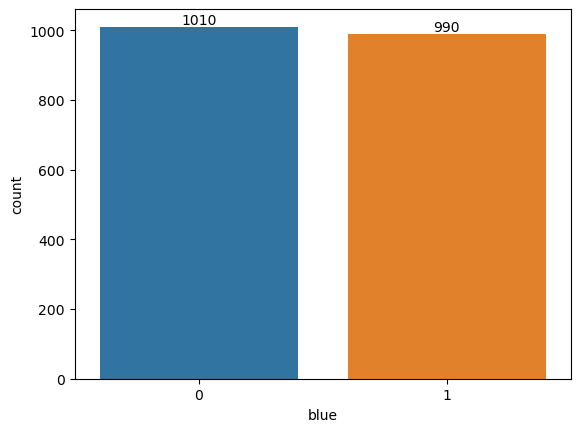

In [14]:
ax=sns.countplot(data=df, x="blue")
for count in ax.containers:
    ax.bar_label(count)

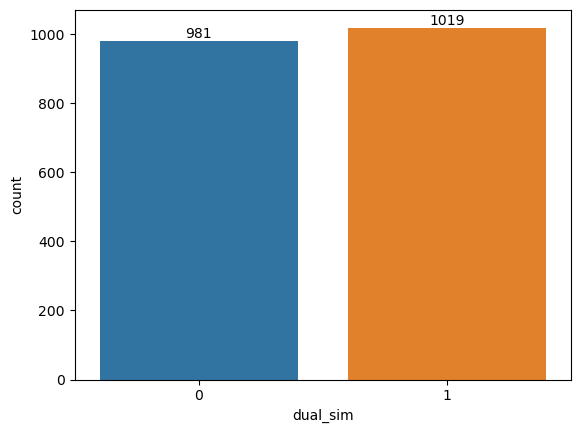

In [15]:
ax=sns.countplot(data=df, x="dual_sim")
for count in ax.containers:
    ax.bar_label(count)

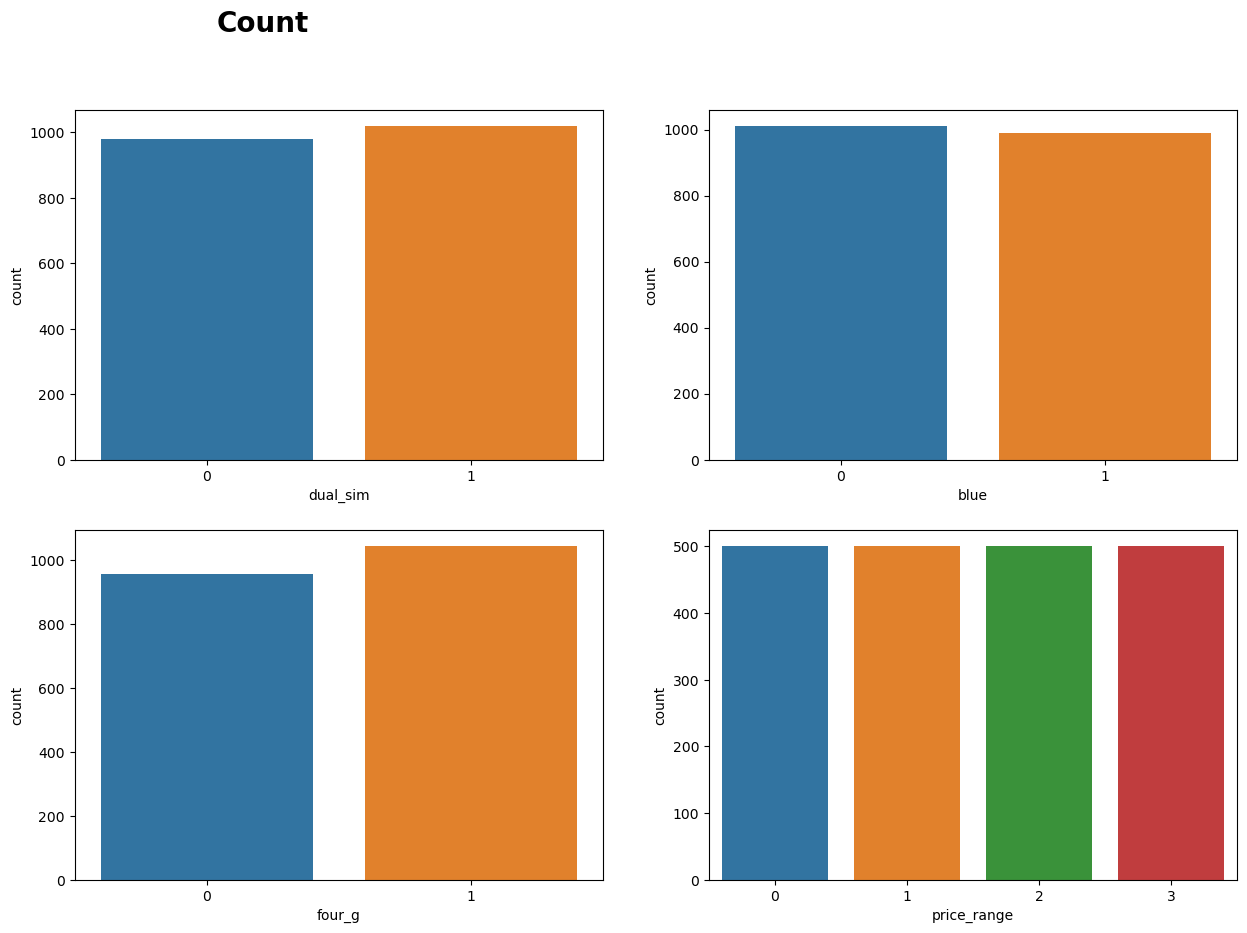

In [17]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
fig.suptitle(t="Count",x=0.25,size=20,fontweight ="bold")
sns.countplot(ax=axes[0,0],data=df,x='dual_sim')
sns.countplot(ax=axes[0,1],data=df,x='blue')
sns.countplot(ax=axes[1,0],data=df,x='four_g')
sns.countplot(ax=axes[1,1],data=df,x='price_range')


plt.show()

<Axes: >

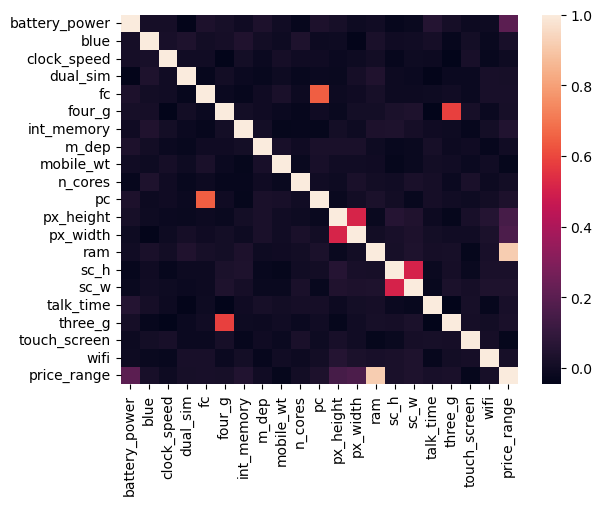

In [26]:
corr=df.corr()
sns.heatmap(corr)

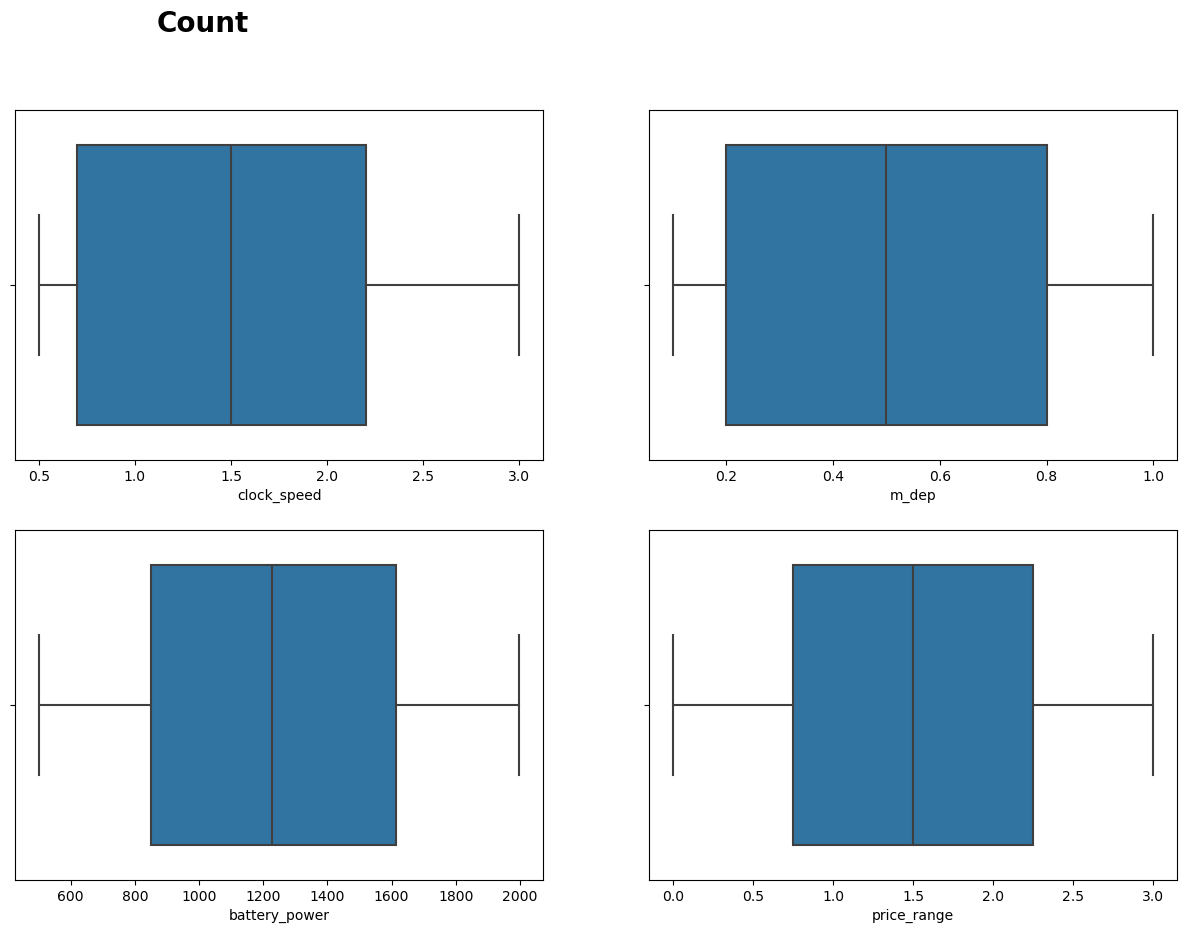

In [33]:
#Recollecting that one of the assumption of Logistic Regression is there should be no outliers
fig,axes=plt.subplots(2,2,figsize=(15,10))
fig.suptitle(t="Count",x=0.25,size=20,fontweight ="bold")
sns.boxplot(ax=axes[0,0],data=df,x='clock_speed')
sns.boxplot(ax=axes[0,1],data=df,x='m_dep')
sns.boxplot(ax=axes[1,0],data=df,x='battery_power')
sns.boxplot(ax=axes[1,1],data=df,x='price_range')


plt.show()


In [49]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# No outlier is detected 

In [50]:
x=df[['battery_power','ram','fc','pc','three_g']]
y=df["price_range"]

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1400, 5)
(1400,)
(600, 5)
(600,)


In [53]:
from sklearn import linear_model
logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(x,y)

C:\Users\WCSC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
logr = linear_model.LogisticRegression(max_iter=1000)

pipeline = make_pipeline(scaler, logr)
pipeline.fit(x, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [55]:
logr = linear_model.LogisticRegression(max_iter=1000, solver='liblinear') 
logr.fit(x, y)


LogisticRegression(max_iter=1000, solver='liblinear')

In [57]:
predictions = logr.predict(x)
predictions

array([2, 2, 2, ..., 3, 0, 3], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = logr.predict(x)


accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


class_report = classification_report(y, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.7435
Confusion Matrix:
 [[456  44   0   0]
 [112 289  99   0]
 [  4  80 264 152]
 [  0   0  22 478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       500
           1       0.70      0.58      0.63       500
           2       0.69      0.53      0.60       500
           3       0.76      0.96      0.85       500

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.73      2000
weighted avg       0.74      0.74      0.73      2000

